## Modeling and Model Evaluation
Code written by Julia Taussig and edited by Julia Taussig

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn import svm
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

%matplotlib inline 

In [17]:
train = pd.read_csv('./data/train_clean_Anna1.csv')

In [18]:
test = pd.read_csv('./data/test_clean_Anna1.csv')

In [19]:
pd.set_option('display.max_columns', 20)

In [20]:
train.head()

,Unnamed: 0,age,workclass,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,is_USA,is_married,education_scale,job_scale,edu_scale * is_married,capital-net
0,0,39,State-gov,Adm-clerical,1,2174,0,40,United-States,0,1,0,9,2,0,2174
1,1,50,Self-emp-not-inc,Exec-managerial,1,0,0,13,United-States,0,1,1,9,5,9,0
2,2,38,Private,Handlers-cleaners,1,0,0,40,United-States,0,1,0,6,1,0,0
3,3,53,Private,Handlers-cleaners,1,0,0,40,United-States,0,1,1,4,1,4,0
4,4,28,Private,Prof-specialty,0,0,0,40,Cuba,0,0,1,9,4,9,0


In [21]:
test.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,...,capital-loss,hours-per-week,native-country,capital-net,is_USA,is_married,education_scale,unemployed,job_scale,edu_scale * is_married
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,1,...,0,40,United-States,0,1,0,4,0,2,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,...,0,50,United-States,0,1,1,6,0,2,6
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,1,...,0,40,United-States,0,1,1,8,0,4,8
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,1,...,0,40,United-States,7688,1,1,7,0,2,7
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,0,...,0,30,United-States,0,1,0,7,1,1,0


In [25]:
train.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
test.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [22]:
#Dropping native_country:
train.drop(labels = 'native-country', axis = 1, inplace = True)
test.drop(labels = 'native-country', axis = 1, inplace = True)

In [46]:
len(train.columns)

14

In [47]:
len(test.columns)

13

In [45]:
train.columns

Index(['age', 'workclass', 'occupation', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'wage', 'is_USA', 'is_married', 'education_scale',
       'job_scale', 'edu_scale * is_married', 'capital-net'],
      dtype='object')

In [44]:
test.columns

Index(['age', 'workclass', 'occupation', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'capital-net', 'is_USA', 'is_married',
       'education_scale', 'job_scale', 'edu_scale * is_married'],
      dtype='object')

In [43]:
#train.drop(labels = 'education', axis = 1, inplace = True)
#test.drop(labels = 'education', axis = 1, inplace = True)
#test.drop(labels = 'fnlwgt', axis = 1, inplace = True)
#test.drop(labels = 'marital-status', axis = 1, inplace = True)
#test.drop(labels = 'relationship', axis = 1, inplace = True)
#test.drop(labels = 'education-num', axis = 1, inplace = True)
#test.drop(labels = 'unemployed', axis = 1, inplace = True)

In [49]:
#Creating dummies:
train_dum = pd.get_dummies(train)

In [50]:
train.head()

,age,workclass,occupation,sex,capital-gain,capital-loss,hours-per-week,wage,is_USA,is_married,education_scale,job_scale,edu_scale * is_married,capital-net
0,39,State-gov,Adm-clerical,1,2174,0,40,0,1,0,9,2,0,2174
1,50,Self-emp-not-inc,Exec-managerial,1,0,0,13,0,1,1,9,5,9,0
2,38,Private,Handlers-cleaners,1,0,0,40,0,1,0,6,1,0,0
3,53,Private,Handlers-cleaners,1,0,0,40,0,1,1,4,1,4,0
4,28,Private,Prof-specialty,0,0,0,40,0,0,1,9,4,9,0


In [51]:
#Creating dummies:
test_dum = pd.get_dummies(test)

In [52]:
test.head()

,age,workclass,occupation,sex,capital-gain,capital-loss,hours-per-week,capital-net,is_USA,is_married,education_scale,job_scale,edu_scale * is_married
0,25,Private,Machine-op-inspct,1,0,0,40,0,1,0,4,2,0
1,38,Private,Farming-fishing,1,0,0,50,0,1,1,6,2,6
2,28,Local-gov,Protective-serv,1,0,0,40,0,1,1,8,4,8
3,44,Private,Machine-op-inspct,1,7688,0,40,7688,1,1,7,2,7
4,18,?,?,0,0,0,30,0,1,0,7,1,0


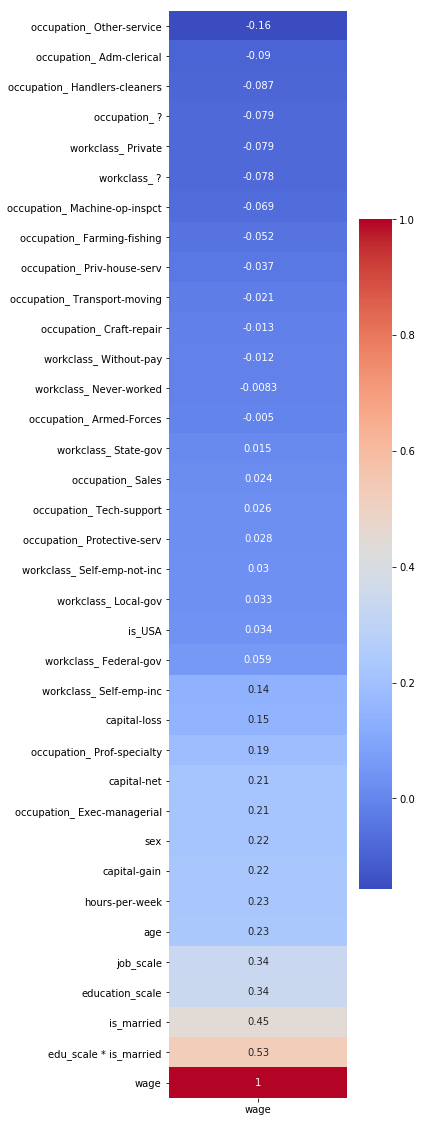

In [53]:
plt.figure(figsize = (4,20)) #wage = 0 if make <50k, 1 if make >50k
sns.heatmap(train_dum.corr()[['wage']].sort_values('wage'), annot=True, cmap='coolwarm')

In [62]:
train_dum.corr()[abs(train_dum.corr()['wage']) > 0.03][['wage']].sort_values(by='wage', ascending = False)

,wage
wage,1.000000
edu_scale * is_married,0.530051
is_married,0.445289
education_scale,0.342418
job_scale,0.339006
age,0.234037
hours-per-week,0.229689
capital-gain,0.223329
sex,0.215980
occupation_ Exec-managerial,0.214861


In [55]:
train_dum.columns

Index(['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'wage',
       'is_USA', 'is_married', 'education_scale', 'job_scale',
       'edu_scale * is_married', 'capital-net', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving'],
      dtype='object')

In [64]:
test_dum.columns

Index(['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'capital-net', 'is_USA', 'is_married', 'education_scale', 'job_scale',
       'edu_scale * is_married', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving'],
      dtype='object')

In [66]:
X_col = ['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'is_USA', 'is_married', 'education_scale', 'job_scale',
         'edu_scale * is_married', 'capital-net', 
         'workclass_ Private', 'workclass_ Self-emp-inc']

In [74]:
X = train_dum[X_col]
y = train_dum['wage']

In [79]:
#Splitting up the data:
#Using 75% of data for training and 25% of data for testing
#Making sure to shuffle the data since there may be a dependency of hurricane intensity with increasing year
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = y,
                                                    random_state=42)

In [80]:
#Instantiating StandardScaler for X variables:
ss = StandardScaler()

#Fitting and transforming the train data:
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
#Transforming the test data:
X_test_ss = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [81]:
train['wage'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: wage, dtype: float64

Baseline: assume all make <50k and would be 75.9% accurate.

In [83]:
#Instantiating Model:
svc = svm.SVC()

#Setting up the parameters that will be inspected during GridSearchCV:
svc_params = {
    'kernel': ['rbf', 'linear'], #'polynomial', 'sigmoid'], #looking at various numbers kernels
    'gamma' : ['auto', 'scale'],
    'C' : [0.1, 0.5, 0.9, 1.0], #looking at various penalty parameter (C) values
    #'degree' : [2, 3, 4], #looking at different degrees for the polynomial kernel
}

#Doing the gridsearch:
gs = GridSearchCV(svc, param_grid = svc_params, cv=3)

#Fitting the model:
gs.fit(X_train_ss, y_train)

#Generating predictions:
gs_preds = gs.predict(X_test_ss)

#Generating metrics and printing them to see how well the model performed:
print(gs.best_params_)
model_train_score_1 = gs.score(X_train_ss, y_train)
model_test_score_1 = gs.score(X_test_ss, y_test)
model_cv_score_1 = gs.best_score_
model_r2_score_1 = r2_score(y_test, gs_preds)

#Generating and displaying the model metrics dataframe
df_metrics = pd.DataFrame(columns = ['Model', 'Train Score', 'Test Score', 
                                     'Cross-Validation Score', 'R2 Score Post Rev. Trans.'])
df_metrics.loc[0] = ['Baseline_LR', model_train_score_1, model_test_score_1, model_cv_score_1, model_r2_score_1]

df_metrics

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


,Model,Train Score,Test Score,Cross-Validation Score,R2 Score Post Rev. Trans.
0,Baseline_LR,0.858026,0.856529,0.852785,0.215115


Note that we got close on time, so we used the best model we made.  Anna Haas created that model.  I'll attempt to replicate it at another time.